**Import des bibliothèques**

In [71]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Pour les réseaux de neurones feed-forward
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Pour le découpage des échantillons
from sklearn.model_selection import train_test_split


**Fonctions de base**


In [72]:
def genere_X(n,trou,corrupt):
  #  Si trou <= 0 : Genere un echantillon uniforme sur [0,1]
  #  Si (0< trou <0.5) : Genere un échantillon dont le support est dans [0,trou] U [1-trou, 1]
  #  Si (0< trou <0.5) et (corrupt != 0) : ajoute un example 0.5
    X = np.zeros(n)

    if (trou > 0) & (trou < 0.5):
        n2 = math.floor(n/2)
        X[0:n2] =  np.random.uniform(0, trou, n2)
        X[n2:] = np.random.uniform(1- trou , 1, n2)
        if (corrupt != 0):
            X[np.random.randint(0, n)] = 0.5
    else :
        X = np.random.uniform(0, 1, n)

    return X.reshape(-1, 1)
################################################################
def genere_Y(X,f,corrupt_value):
    # Genere Y suivant la fonction cosinus de frequence f
    # Si une entrée de X vaut 0.5, le Y correspondant vaut corrupt_value
    Y = np.cos(f*X)

    indices = np.where(X == 0.5)[0]
    if indices.size > 0:
        Y[indices] = corrupt_value

    return Y
################################################################
def genere_NN_dense(X,taille_output,largeur,profondeur):
    # X : sert à donner la taille de la couche d'entrée
    # taille_output : donne la taille de la couche de sortie
    # largeur : c'est la largeur des couches cachées
    # profondeur : Le nombre de couches cachées

    model = Sequential()   #crée un réseau de neurone vide
    for i in range(profondeur):      # crée les couches cachées
        model.add(Dense(largeur, activation='relu'))

    model.add(Dense(taille_output, activation='linear'))  #crée la couche de sortie

    y = model(X) # Pour donner la taille de la première couche

    return model
################################################################


# **Génère un echantillon**

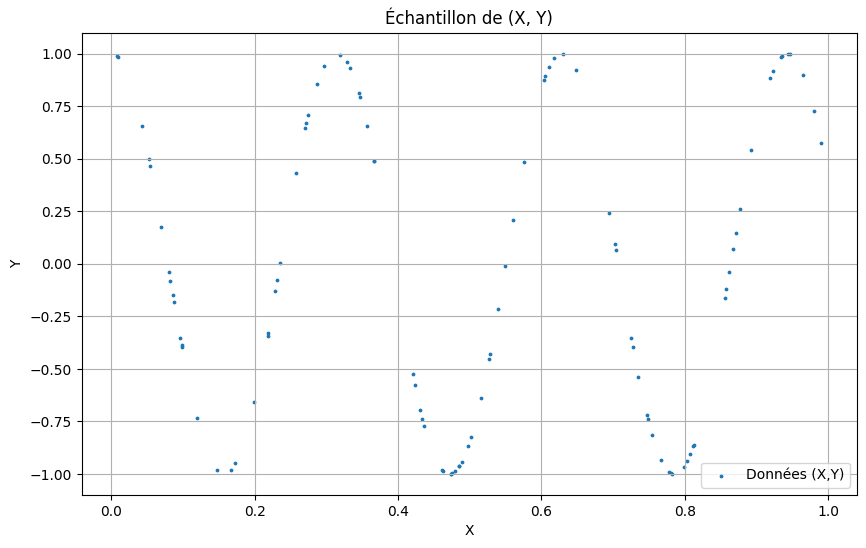

In [80]:
# caracteristiques de la distribution (X,Y)
f = 20       # Plus la frequence est élevée plus le problème est difficile
trou = 0.     # 0 ou dans (0,0.5)
corrupt = 1     # Pour visualiser que le réseau peut prendre n'importe quelle valeur en 0.5
corrupt_value = 10    # idem

# Définir la taille de l'échantillon
n = 100  # Nombre de points dans l'échantillon

# Génére X
X = genere_X(n,trou,corrupt )
Y = genere_Y(X,f,corrupt_value)

# Afficher (X,Y)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Données (X,Y)', alpha=1, s=3)
plt.title("Échantillon de (X, Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

**Génère un réseau de neurones ReLU "fully-connected" (i.e. feed forward ou dense)**

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (100, 50)                   │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (100, 1)                    │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,901 (50.39 KB)

 Trainable params: 12,901 (50.39 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


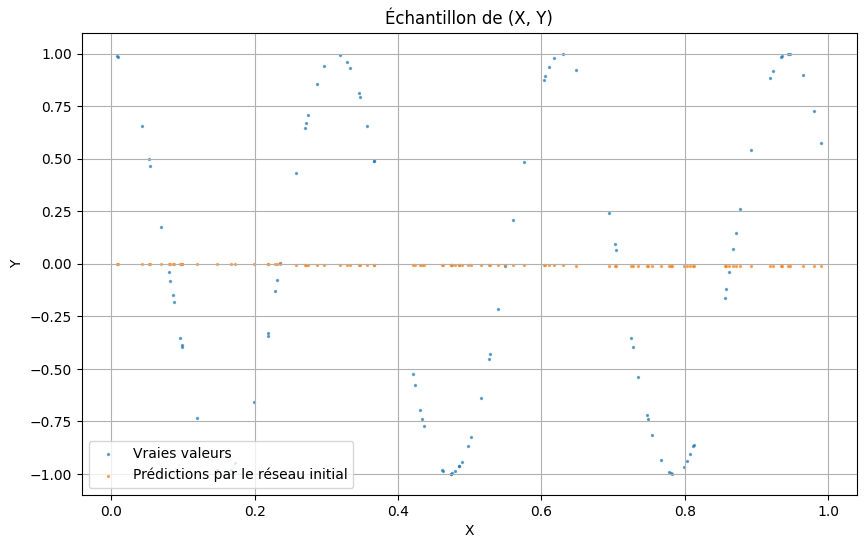

In [82]:
# architecture du réseau
largeur = 50
profondeur = 6
taille_output = 1

# Création du réseau de neurone (initialisation à 0)
model = genere_NN_dense(X,taille_output,largeur,profondeur)

# Affichage du modèle
model.summary()

# Prédiction faite par le réseau initial

Y_pred = model.predict(X)
# Afficher (X,Y)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Vraies valeurs', alpha=0.6, s=2)
plt.scatter(X, Y_pred, label='Prédictions par le réseau initial', alpha=0.6, s=2)
plt.title("Échantillon de (X, Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

**Optimisation du réseau de neurones (i.e. apprentissage)**

Erreur quadratique moyenne sur l'ensemble de test : 0.0013
Erreur absolue moyenne sur l'ensemble de test : 0.0249
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


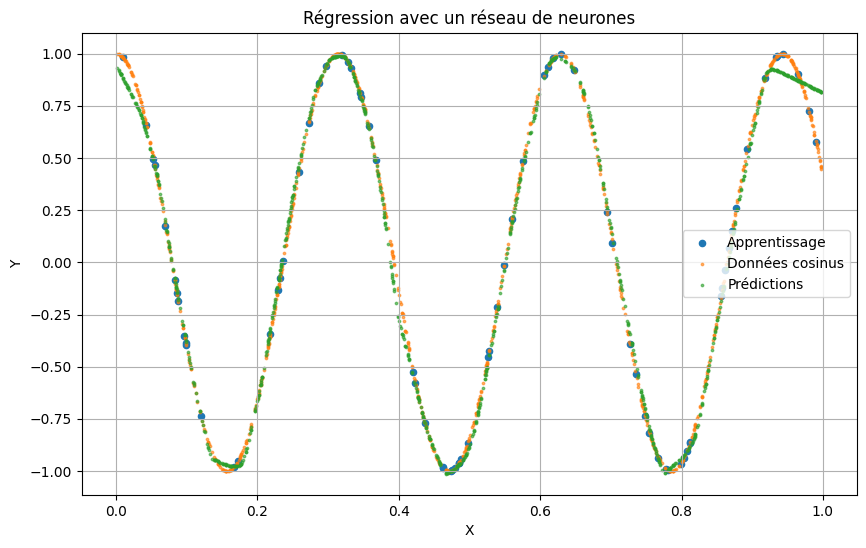

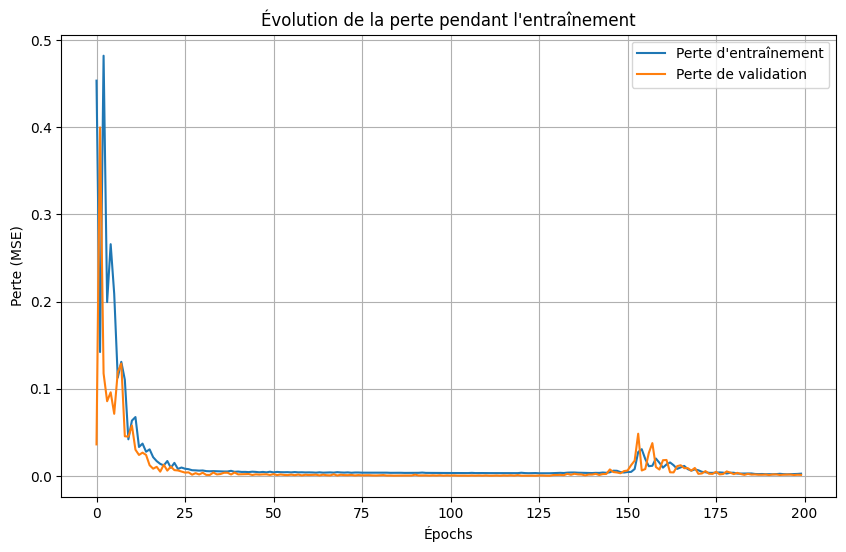

In [86]:
# découpage de l'échantillon
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Compilation du modèle (pour nous : définition de l'optimiseur et de la loss)
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Optimisation des paramètres du modèle
history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)  # Essayer avec verbose = 1

# Évaluation du modèle
loss, mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"Erreur quadratique moyenne sur l'ensemble de test : {loss:.4f}")
print(f"Erreur absolue moyenne sur l'ensemble de test : {mae:.4f}")

# Affichage des fonctions
X_draw =  np.random.uniform(0, 1, 1000).reshape(-1, 1)
Y_draw_cos = np.cos(f*X_draw)
Y_draw_pred = model.predict(X_draw)

# Graphique : données réelles vs prédictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label='Apprentissage', alpha=1, s=20)
plt.scatter(X_draw, Y_draw_cos, label='Données cosinus', alpha=0.6, s=3)
plt.scatter(X_draw, Y_draw_pred, label='Prédictions', alpha=0.6, s=3)
plt.title("Régression avec un réseau de neurones")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

# Visualisation de la perte pendant l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title("Évolution de la perte pendant l'entraînement")
plt.xlabel("Épochs")
plt.ylabel("Perte (MSE)")
plt.legend()
plt.grid()
plt.show()

1. Décrire ce que fait chacune des fonctions ci-dessus.
2. Ecrire un code pour tester différents learning\_rate et différents nombres d'epochs. Quel réglage recommandez-vous ?
3. Dans cette question, nous allons mettre en évidence le phénomène de régularisation implicite.

  a. Pour une profondeur de $6$, faites varier la largeur pour tracer sur un même graphique :
    - une courbe qui associe l'erreur d'apprentissage au nombre de paramètres
    - une courbe qui associe l'erreur de test au nombre de paramètres

  b. Que se passe-t-il lorsque le nombre de paramètres du réseau devient très grand ?
4. Dans cette question, nous voulons visualiser le phénomène de régularisation implicite. Pour cela, nous allons créer des inputs $X$ ne couvrant pas tout le support. Pour compléter l'étude, dans un second temps, nous rajouterons un point aberrant, isolé.

  a. Utiliser la fonction genere\_X pour créer un échantillon dont le support est inclus dans $[0,0.3]\cup [0.7,1]$.

  b. Faire 10 fois l'apprentissage d'un réseau de neurones de profondeur 6 et différentes largeurs sur des échantillons ayant les mêmes caractéristiques que dans la question précédente.
  
  Qu'observez-vous sur l'intervalle $[0.3,0.7]$ ?

  c. Utiliser la fonction genere\_X pour créer un échantillon dont le support est inclus dans $[0,0.3]\cup [0.7,1]$, avec un point aberrant en $(0,10)$.

  d. Faire 10 fois l'apprentissage d'un réseau de neurones de profondeur 6 et différentes largeurs sur des échantillons ayant les mêmes caractéristiques que dans la question précédente.
  
  Qu'observez-vous sur l'intervalle $[0.3,0.7]$ ?
